# Analysis Notebook
- In this notebook we show how to use the simulated annealing algorithm class to solve different instances of the knapsack problem.
- We also test the perfomance of the algorithm across different input sizes.

In [ ]:
import numpy as np
from knapsack_sa import SimulatedAnnealingKnapsack
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Quick Implementation Test

In [5]:
'''
Select the input file name from the DATASET folder.
Select the scale type (large or small)
'''

file_name = 'large_1'
scale_type = 'large'

In [7]:
input_file = f'DATASET/{scale_type}_scale/{file_name}'
real_solution_file = f'DATASET/{scale_type}_scale_solution/{file_name}'
sa_knapsack = SimulatedAnnealingKnapsack(file_name, input_file)
seed = 42
    
sa_solution_state, sa_solution_value, running_time = sa_knapsack.run(seed=seed)
print(f'solution_state: {sa_solution_state}\nsolution_value: {sa_solution_value}\nrunning_time {running_time}')

solution_state: [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 solution_value: 8929.0
 running_time 7.689637899398804


## 2. Generating Data for Comprehensive Table

In [15]:
'''
You can choose the scale_type (small or large) and the cell will run all large or small input files n times to compute perfomance
metrics to evaluate the SA algorithm.
'''
n_trials = 10
testing_flag = False
scale_type = 'small'
cutoff =300

if scale_type == 'small':
    n_files = 10
    # Hyperparameters
    max_flips = 5
    cooling_rate = 0.995
    max_iter = 80000

elif scale_type == 'large':
    n_files = 21
    # Hyperparameters
    max_flips = 3 
    cooling_rate = 0.995
    max_iter = 80000

test_file_names = []
for i in range(0, n_files):
    file_name = scale_type + '_' + str(i + 1)
    test_file_names.append(file_name)
print('Files: ', test_file_names)



# Open a CSV file to store the results
results_filename = f'SA_RESULTS/{scale_type}_comprehensive_table/{scale_type}_data_results.csv'
with open(results_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['name','input_size', 'initial_flips', 'cooling_rate', 'max_iter', 'success_rate', 'avg_rel_error', 'avg_runtime', 'avg_best_value', 'real_value'])

    for file_name in test_file_names:
        input_file = f'DATASET/{scale_type}_scale/{file_name}'
        real_solution_file = f'DATASET/{scale_type}_scale_solution/{file_name}'

        sa_knapsack = SimulatedAnnealingKnapsack(file_name, input_file)
        _, problem_size, problem_item_values, _  = sa_knapsack.get_data()

        print(f'Computing for file {file_name} with input size {problem_size}')
  
        error_ls = []
        runtime_ls = []
        best_value_ls = []

        if testing_flag:
            real_solution = []
            with open(real_solution_file, 'r') as file:
                    for line in file:
                        real_solution.append(int(line))
            
            real_solution = np.array(real_solution, dtype=int)
            real_value = np.sum(problem_item_values * real_solution)
        else:
            with open(real_solution_file, 'r') as file:
                 for line in file:
                    real_value = float(line)

        success_n = 0
        seed = 42
        for i in range(n_trials):  # Number of trials
            best_state, best_value, running_time = sa_knapsack.run(cooling_rate=cooling_rate, initial_flips=max_flips, max_iter=max_iter, seed=seed, time_cutoff=cutoff, restart=True)
            relative_error = np.abs((best_value - real_value) / real_value)
            error_ls.append(relative_error)
            runtime_ls.append(running_time)
            best_value_ls.append(best_value)

            if np.isclose(best_value, real_value, atol=1e-8, rtol=1e-5):
                success_n += 1
            seed += 1

        success_rate = success_n / n_trials # Probability of success
        avg_error = np.mean(error_ls)
        avg_runtime = np.mean(runtime_ls)
        avg_best_value = np.mean(best_value_ls)

        # Write the results to the CSV file
        writer.writerow([file_name, problem_size, max_flips, cooling_rate, max_iter, f"{(success_rate):.2f}", f"{(avg_error):.2f}", f"{(avg_runtime):.2f}", f"{(avg_best_value):.2f}", real_value])
    

Files:  ['small_1', 'small_2', 'small_3', 'small_4', 'small_5', 'small_6', 'small_7', 'small_8', 'small_9', 'small_10']
Computing for file small_1 with input size 10
Computing for file small_2 with input size 20
Computing for file small_3 with input size 4
Computing for file small_4 with input size 4
Computing for file small_5 with input size 15
Computing for file small_6 with input size 10
Computing for file small_7 with input size 7
Computing for file small_8 with input size 23
Computing for file small_9 with input size 5
Computing for file small_10 with input size 20


### 2.1 Small Input Comprehensive Table

In [16]:
df_small = pd.read_csv('SA_RESULTS/small_comprehensive_table/small_data_results.csv')
df_small

,name,input_size,initial_flips,cooling_rate,max_iter,success_rate,avg_rel_error,avg_runtime,avg_best_value,real_value
0,small_1,10,5,0.995,80000,1.0,0.0,8.74,295.00,295.0000
1,small_2,20,5,0.995,80000,0.7,0.0,10.34,1020.50,1024.0000
2,small_3,4,5,0.995,80000,1.0,0.0,10.92,35.00,35.0000
3,small_4,4,5,0.995,80000,1.0,0.0,11.10,23.00,23.0000
4,small_5,15,5,0.995,80000,1.0,0.0,10.65,481.07,481.0694
5,small_6,10,5,0.995,80000,1.0,0.0,10.45,52.00,52.0000
6,small_7,7,5,0.995,80000,1.0,0.0,10.84,107.00,107.0000
7,small_8,23,5,0.995,80000,0.0,0.0,11.34,9743.70,9767.0000
8,small_9,5,5,0.995,80000,1.0,0.0,11.88,130.00,130.0000
9,small_10,20,5,0.995,80000,0.8,0.0,12.46,1023.30,1025.0000


### 2.2 Large Input Comprehensive Table

In [14]:
df_large = pd.read_csv('SA_RESULTS/large_comprehensive_table/large_data_results.csv')
df_large

,name,input_size,initial_flips,cooling_rate,max_iter,success_rate,avg_rel_error,avg_runtime,avg_best_value,real_value
0,large_1,100,3,0.995,80000,0.1,0.04,8.87,8811.7,9147.0
1,large_2,200,3,0.995,80000,0.0,0.03,9.19,10896.4,11238.0
2,large_3,500,3,0.995,80000,0.0,0.03,9.20,28080.2,28857.0
3,large_4,1000,3,0.995,80000,0.0,0.01,10.09,53812.5,54503.0
4,large_5,2000,3,0.995,80000,0.0,0.01,12.53,109763.4,110625.0
5,large_6,5000,3,0.995,80000,0.0,0.00,14.68,275776.2,276457.0
6,large_7,10000,3,0.995,80000,0.0,0.00,15.87,563056.0,563647.0
7,large_8,100,3,0.995,80000,0.0,0.07,9.40,1403.4,1514.0
8,large_9,200,3,0.995,80000,0.0,0.07,9.61,1527.4,1634.0
9,large_10,500,3,0.995,80000,0.0,0.03,9.44,4439.6,4566.0


## 3. Generating Plots

In [17]:
'''
This functions help to generate QRTD and SQD plots
'''

def generate_QRTD_plots(instance_name, max_time, true_value, q_star_values):
    directory = f"SA_RESULTS/trace_files_for_graphs/{instance_name}"
    print(directory)
    times = np.linspace(0, max_time, 300)  # evenly spaced times for analysis
    solution_trace_data = []

    # Load all relevant trace files
    trace_files = [f for f in os.listdir(directory) if f.startswith(instance_name)]
    for file in trace_files:
        trace_path = f"{directory}/{file}"
        data = np.loadtxt(trace_path, delimiter=',')
        solution_trace_data.append(data)

    # Initialize the plot before the loops
    plt.figure(figsize=(10, 6))

    for q_star in q_star_values:  # Iterate over each quality threshold
        qrtd_y = []
        for time in times:
            count = 0
            for trace in solution_trace_data:
                # Extract the values and times where the quality criterion is met
                valid_values = trace[np.abs((true_value - trace[:, 1]) / true_value) <= q_star, 0]
                # Check if there are any times where the criterion is met before 'time'
                if valid_values.size > 0 and np.min(valid_values) <= time:
                    count += 1
            qrtd_y.append(count / len(solution_trace_data))  # Fraction of runs meeting the criterion
        plt.plot(times, qrtd_y, label=f'q* = {q_star * 100:.2f}%')  # Plot for each q_star

    # Set plot titles and labels only once
    plt.title(f"QRTD for {instance_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Fraction of runs solved")
    plt.legend()
    plt.grid(True)
    plt.show()  # Display the plot after all lines are added

def generate_SQD_plots(instance_name, selected_times, true_value, max_quality):
    directory = f"SA_RESULTS/trace_files_for_graphs/{instance_name}"
    solution_trace_data = []

    # Load all relevant trace files
    trace_files = [f for f in os.listdir(directory) if f.startswith(instance_name)]
    print(f"Processing files: {trace_files}")  # Debug to see what files are loaded

    for file in trace_files:
        trace_path = f"{directory}/{file}"
        data = np.loadtxt(trace_path, delimiter=',')
        solution_trace_data.append(data)

    # Prepare quality thresholds for plotting
    quality_thresholds = np.linspace(0, max_quality, num=100)  # More granular quality thresholds

    plt.figure(figsize=(10, 6))

    for time in selected_times:
        sqd_y = []
        for quality in quality_thresholds:
            count = 0
            for trace in solution_trace_data:
                # Filter values by the selected time
                valid_values = trace[trace[:, 0] <= time, 1]
                if valid_values.size > 0:
                    # Calculate the minimum relative error for values at this time
                    min_relative_error = np.min(np.abs((true_value - valid_values) / true_value))
                    # Count this trace if its best performance at this time is within the current quality threshold
                    if min_relative_error <= quality:
                        count += 1
            # Normalized by the number of traces (each trace is considered only once per quality threshold)
            sqd_y.append(count / len(solution_trace_data))

        plt.plot(quality_thresholds * 100, sqd_y, label=f'Time = {time}s')  # Plot for each selected time

    # Set plot titles and labels
    plt.title(f"SQD for {instance_name}")
    plt.xlabel("Solution Quality (%)")
    plt.ylabel("Fraction of runs meeting quality")
    plt.legend()
    plt.grid(True)
    plt.show()

def generate_box_plots_for_running_times(instance_name):
    directory = f"SA_RESULTS/trace_files_for_graphs/{instance_name}"
    running_times = []

    # Load all relevant trace files
    trace_files = [f for f in os.listdir(directory) if f.startswith(instance_name)]
    for file in trace_files:
        trace_path = f"{directory}/{file}"
        data = np.loadtxt(trace_path, delimiter=',')
        
        # Extract the running times from the first column
        times = data[:, 0]
        
        # Store the maximum time of this trace as the total running time
        if times.size > 0:
            running_times.append(max(times))
    
    # Create a box plot for the running times
    plt.figure(figsize=(10, 6))
    boxprops = dict(linestyle='-', linewidth=2, color='k', facecolor='lightblue')
    flierprops = dict(marker='o', color='green', alpha=0.5)
    whiskerprops = dict(color='black')
    capprops = dict(color='red')
    medianprops = dict(color='yellow', linewidth=2)
    
    bp = plt.boxplot(running_times, vert=True, patch_artist=True, boxprops=boxprops, medianprops=medianprops,
                     whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, showfliers=True)

    plt.title(f"Box Plot of Running Times for {instance_name}")
    plt.ylabel("Running Time (seconds)")
    plt.xlabel("Instance")
    plt.grid(True)

    # Extracting whisker information
    whiskers = [item.get_ydata() for item in bp['whiskers']]
    whisker_min = whiskers[0][1]  # Lower whisker value
    whisker_max = whiskers[1][1]  # Upper whisker value

    # Annotate statistics with smaller font size
    median = np.median(running_times)
    q1 = np.percentile(running_times, 25)
    q3 = np.percentile(running_times, 75)

    plt.text(1.1, median, f'Median: {median:.2f}', verticalalignment='center', fontsize=9)
    plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='center', fontsize=9)
    plt.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='center', fontsize=9)
    plt.text(1.1, whisker_min, f'Min: {whisker_min:.2f}', verticalalignment='center', fontsize=9)
    plt.text(1.1, whisker_max, f'Max: {whisker_max:.2f}', verticalalignment='center', fontsize=9)

    plt.show()

SA_RESULTS/trace_files_for_graphs/large_7


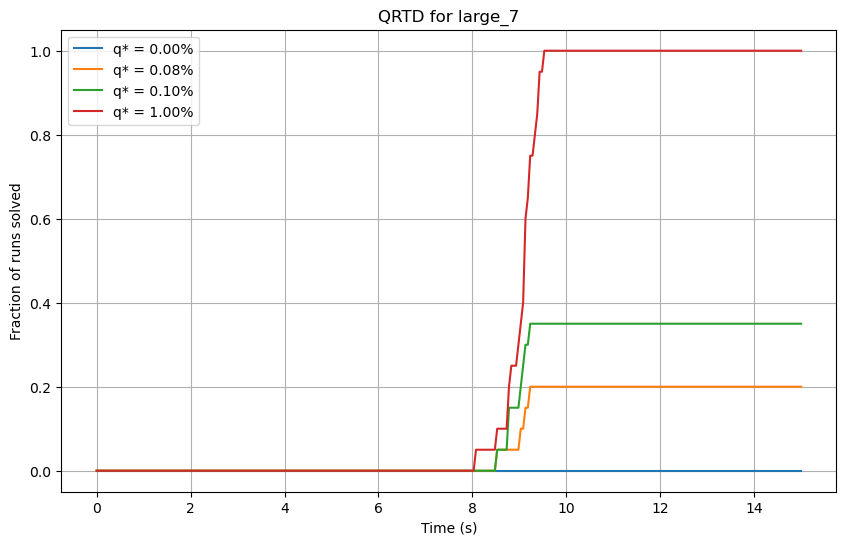

In [18]:
'''
To generate a plot select the scale type (large or small) and the specific input instance you want to analyze.
You have to make sure that the trace files for the selected instance are present in a folder under the "trace_files_for_graphs" folder under the "SA_RESULTS" directory.
'''

scale_type = 'large'
instance_name = "large_7"

true_solution_file = f'DATASET/{scale_type}_scale_solution/{instance_name}'
with open(true_solution_file, 'r') as file:
     for line in file:
         true_value = float(line)

generate_QRTD_plots(instance_name, max_time=15, true_value=true_value, q_star_values=[0.0, 0.0008, 0.001, 0.01])

Processing files: ['large_7_SA_300_50.trace', 'large_7_SA_300_52.trace', 'large_7_SA_300_43.trace', 'large_7_SA_300_49.trace', 'large_7_SA_300_57.trace', 'large_7_SA_300_47.trace', 'large_7_SA_300_48.trace', 'large_7_SA_300_58.trace', 'large_7_SA_300_45.trace', 'large_7_SA_300_56.trace', 'large_7_SA_300_53.trace', 'large_7_SA_300_51.trace', 'large_7_SA_300_60.trace', 'large_7_SA_300_54.trace', 'large_7_SA_300_44.trace', 'large_7_SA_300_46.trace', 'large_7_SA_300_42.trace', 'large_7_SA_300_61.trace', 'large_7_SA_300_59.trace', 'large_7_SA_300_55.trace']


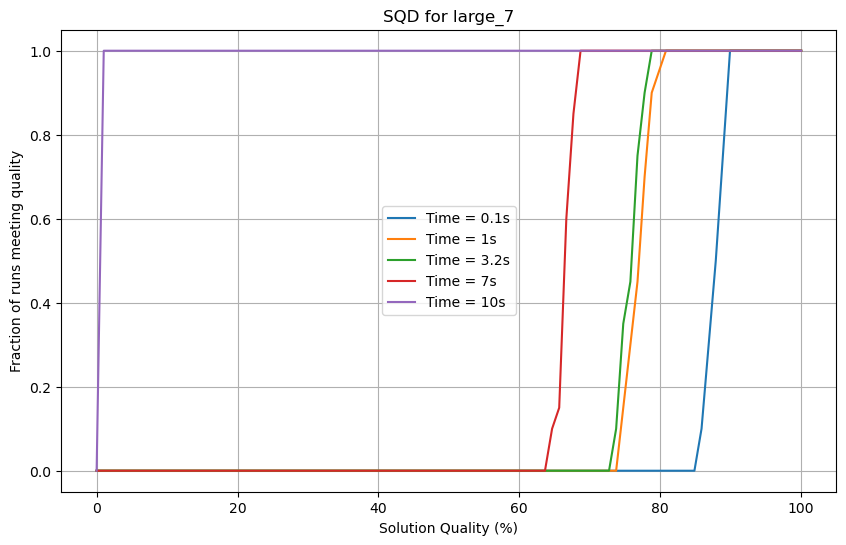

In [19]:
generate_SQD_plots(instance_name,selected_times=[0.1, 1, 3.2, 7, 10], true_value=true_value, max_quality=1)

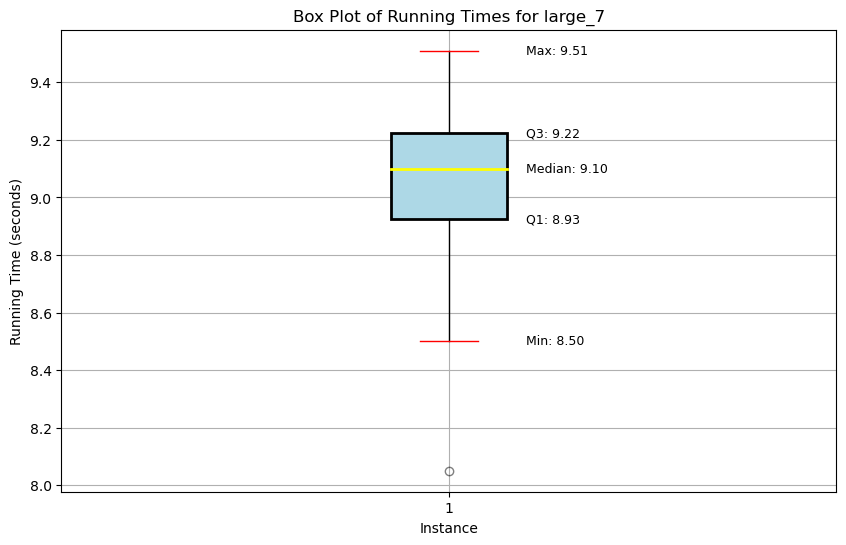

In [20]:
generate_box_plots_for_running_times(instance_name='large_7')

SA_RESULTS/trace_files_for_graphs/large_1


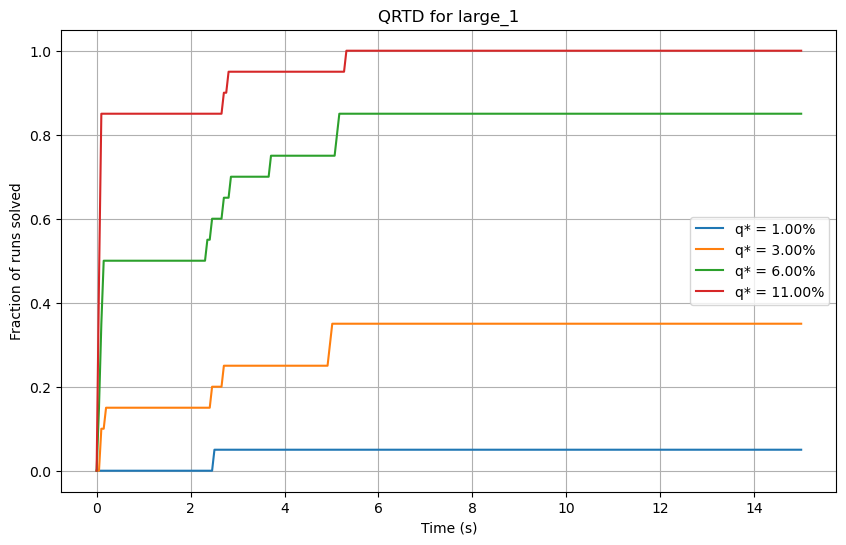

In [21]:
scale_type = 'large'
instance_name = "large_1"

true_solution_file = f'DATASET/{scale_type}_scale_solution/{instance_name}'
with open(true_solution_file, 'r') as file:
     for line in file:
         true_value = float(line)

generate_QRTD_plots(instance_name, max_time=15, true_value=true_value, q_star_values=[0.01, 0.03, 0.06, 0.11])

Processing files: ['large_1_SA_300_56.trace', 'large_1_SA_300_59.trace', 'large_1_SA_300_55.trace', 'large_1_SA_300_45.trace', 'large_1_SA_300_51.trace', 'large_1_SA_300_52.trace', 'large_1_SA_300_49.trace', 'large_1_SA_300_50.trace', 'large_1_SA_300_47.trace', 'large_1_SA_300_43.trace', 'large_1_SA_300_54.trace', 'large_1_SA_300_48.trace', 'large_1_SA_300_57.trace', 'large_1_SA_300_44.trace', 'large_1_SA_300_60.trace', 'large_1_SA_300_42.trace', 'large_1_SA_300_53.trace', 'large_1_SA_300_46.trace', 'large_1_SA_300_61.trace', 'large_1_SA_300_58.trace']


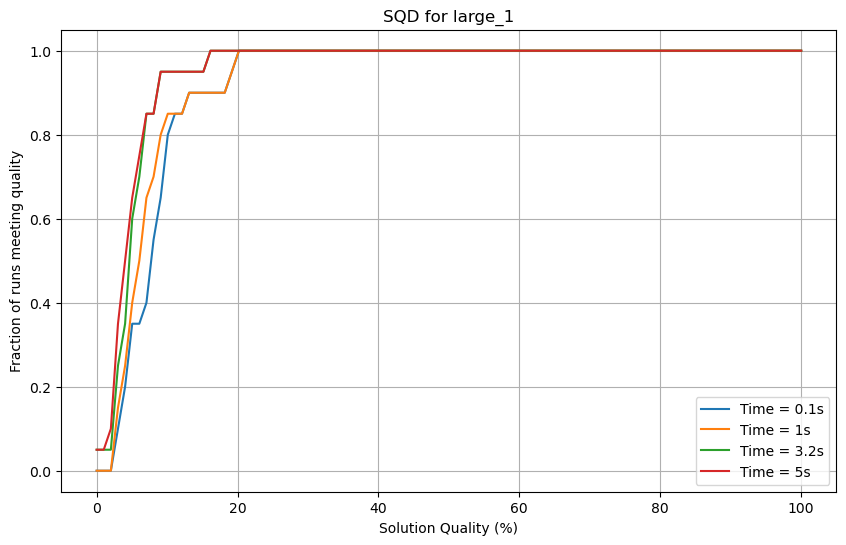

In [22]:
generate_SQD_plots(instance_name,selected_times=[0.1, 1, 3.2, 5], true_value=true_value, max_quality=1)

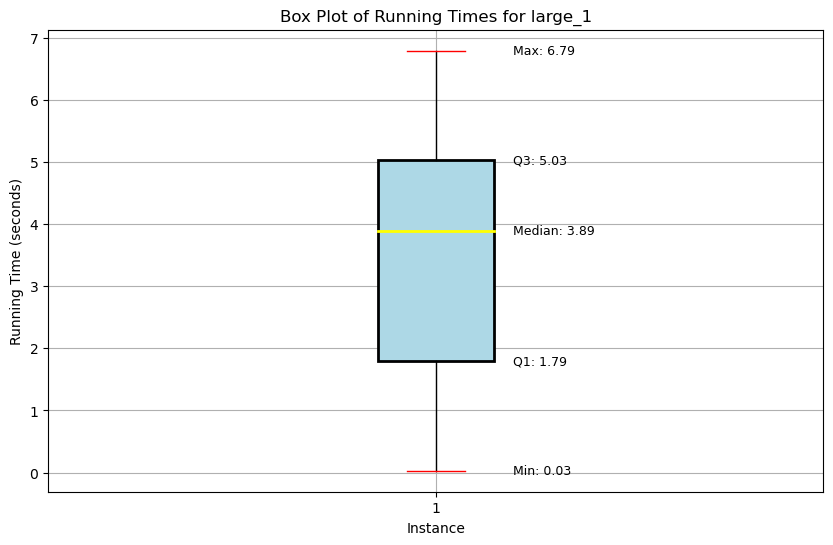

In [23]:
generate_box_plots_for_running_times(instance_name='large_1')